In [52]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt
import matplotlib.ticker as plticker
import matplotlib.dates
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

## DIY k-means algorithm

We randomly generate clustered data points in order to see the accuracy of our DIY k-means algorithm. 

In [23]:
X, y, center = make_blobs(n_samples=200, centers=4, n_features=2, cluster_std = 0.5, random_state=0, return_centers=True) 
# X - array with coordinates, y - The integer labels for cluster membership of each sample.

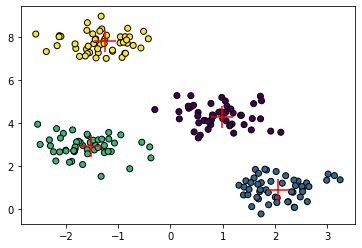

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.scatter(center[:, 0], center[:, 1], marker= '+', s=500, color = 'red')
plt.show()

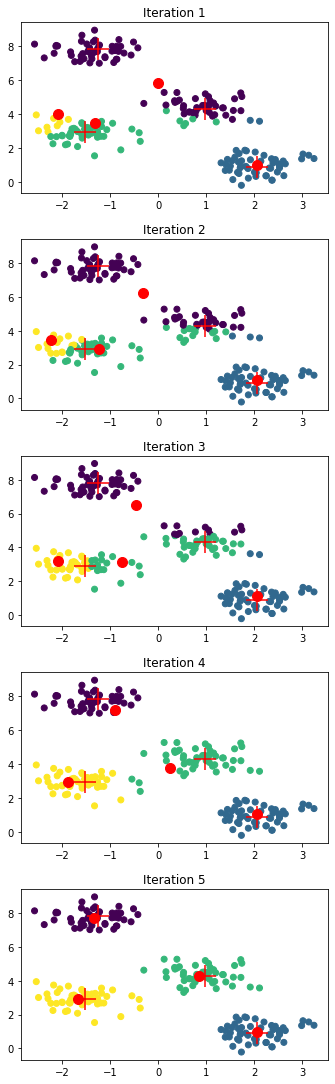

In [25]:
k = 4
iterations = 5

index = np.random.choice(X.shape[0], k, replace=False) # random point from data
centroids = X[index] 
distances = distance.cdist(X, centroids ,'euclidean') # distance between every point and centroids, returns array of lists with len = no of centroids
points = np.array([np.argmin(i) for i in distances]) # array with index from list, that represents argmin distance

fig, axs = plt.subplots(iterations, 1, figsize = (5,15))
fig.tight_layout(h_pad=2.5)

for x in range(iterations): 
    centroids = []
    for i in range(k):
        temp_cent = X[points==i].mean(axis=0) 
        centroids.append(temp_cent)

    centroids = np.vstack(centroids) 
    distances = distance.cdist(X, centroids ,'euclidean')
    points = np.array([np.argmin(i) for i in distances])
    
    axs[x].scatter(X[:, 0], X[:, 1], c=points)
    axs[x].scatter(center[:, 0], center[:, 1], marker= '+', s=500, color = 'red')
    axs[x].set_title('Iteration {}'.format(x+1))
    axs[x].scatter(centroids[:, 0], centroids[:, 1], marker= 'o', s=100, color = 'red')
        
    

In [27]:
kmeans = KMeans(n_clusters=4).fit(X)

In [28]:
kmeans.cluster_centers_

array([[-1.33173192,  7.7400479 ],
       [ 2.06911036,  0.96146833],
       [-1.60782913,  2.9162828 ],
       [ 0.91932803,  4.34824615]])

In [26]:
centroids

array([[-1.33173192,  7.7400479 ],
       [ 2.06911036,  0.96146833],
       [ 0.84236336,  4.26056348],
       [-1.68234709,  2.92375708]])

## Data preparation

Data from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package


In [3]:
rain = pd.read_csv('weatherAUS.csv')
rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
#Filling the missing values for continuous variables with mean
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MaxTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [5]:
rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

In [6]:
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

In [7]:
#rain=rain.iloc[:,1:]
rain = rain.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1)

In [8]:
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])

In [9]:
s = pd.to_datetime(rain['Date'], format='%Y-%m-%d', errors='coerce')

rain['month'] = s.dt.month
rain['year'] = s.dt.year


In [59]:
columns = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'month', 'year']
year = rain[columns]
year = year[year['year']==2017]
year = year[year['Location']==1]
kol = ['MinTemp', 'MaxTemp']
year = year[kol]

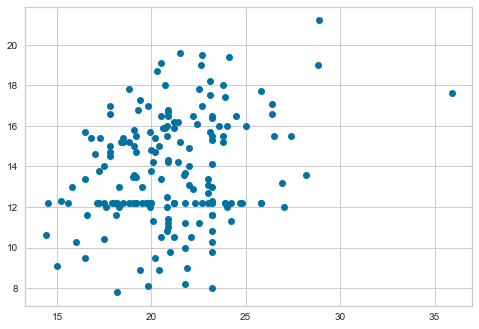

In [53]:
fig, ax = plt.subplots()
ax.plot(year['MaxTemp'], year['MinTemp'], 'bo')
plt.show()

In [57]:
year = rain[columns]
year = year[year['year']==2017]
year = year[year['Location']==1]
col2 = ['MinTemp', 'month']
yeartemp = year[col2]

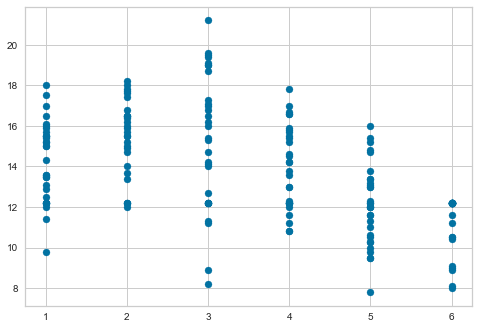

In [55]:
plt.scatter(yeartemp['month'], yeartemp['MinTemp'])

## Clustering

In [60]:
scaler = StandardScaler()
X = year.values
X = scaler.fit_transform(X)

X2 = yeartemp.values
X2 = scaler.fit_transform(X2)

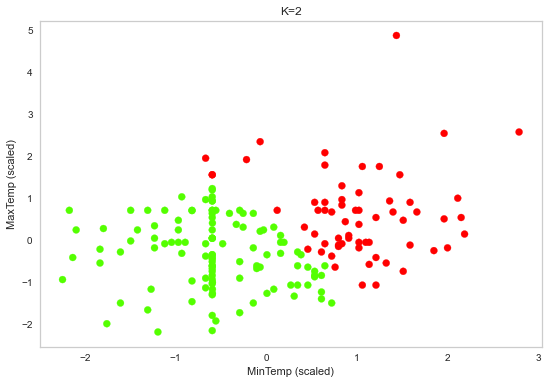

In [96]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2_pred = kmeans_2.fit_predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_2_pred, cmap='prism')
plt.xlabel('MinTemp (scaled)')
plt.ylabel('MaxTemp (scaled)')
plt.title('K=2')
plt.grid()

Text(0, 0.5, 'MaxTemp (scaled)')

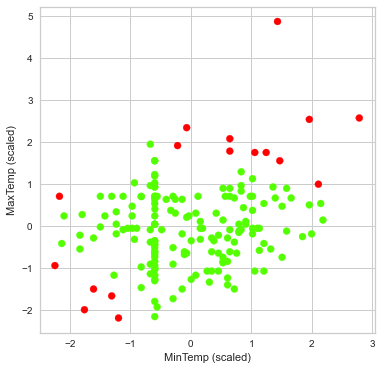

In [97]:
dbscan_clusterX = DBSCAN(eps=0.5)
dbscan_cluster.fit(X)
dbs2_pred = dbscan_clusterX.fit_predict(X)

plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_cluster.labels_, cmap='prism')
plt.xlabel('MinTemp (scaled)')
plt.ylabel('MaxTemp (scaled)')

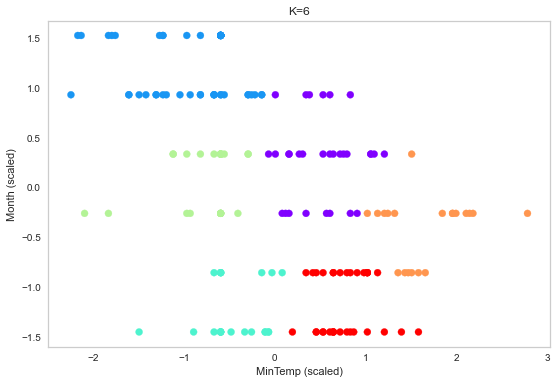

In [100]:
kmeans_6 = KMeans(n_clusters=6)
kmeans_6_pred = kmeans_6.fit_predict(X2)

plt.figure(figsize=(9, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=kmeans_6_pred, cmap = 'rainbow')
plt.xlabel('MinTemp (scaled)')
plt.ylabel('Month (scaled)')
plt.title('K=6')
plt.grid()

Text(0, 0.5, 'Month (scaled)')

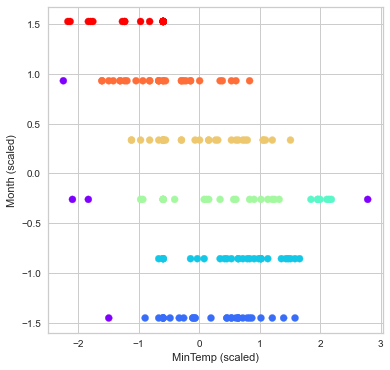

In [103]:
dbscan_clusterX2 = DBSCAN(eps=0.5)
dbscan_cluster.fit(X2)
dbs6_pred = dbscan_clusterX2.fit_predict(X2)
plt.figure(figsize = (6, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=dbscan_cluster.labels_, cmap='rainbow')
plt.xlabel('MinTemp (scaled)')
plt.ylabel('Month (scaled)')

## Hyperparameter k adjustment (elbow method)

C:\Users\vitam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

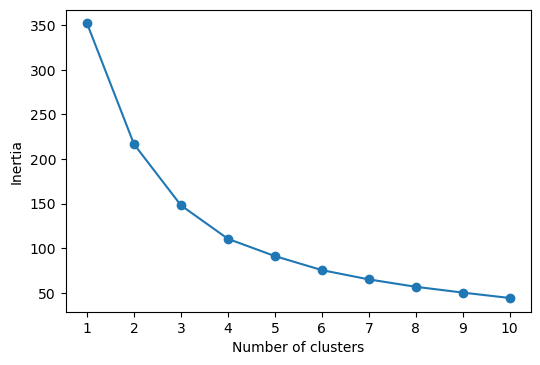

In [25]:
inertia_scores = []
ks = list(range(1,10 +1))
for k in ks:
    km = KMeans(n_clusters = k)
    y_pred = km.fit_predict(X)
    inertia_scores.append(km.inertia_)
    
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(ks, inertia_scores, marker= 'o')
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

C:\Users\vitam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

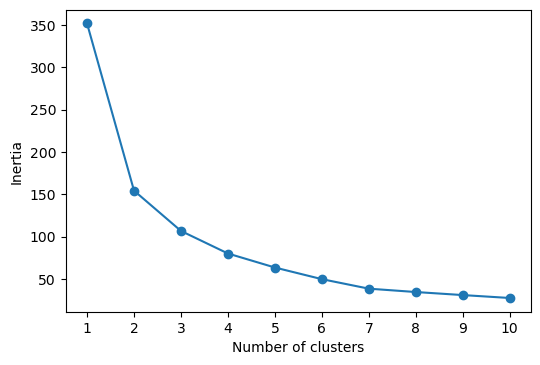

In [26]:
inertia_scores = []
ks = list(range(1,10 +1))
for k in ks:
    km = KMeans(n_clusters = k)
    y_pred = km.fit_predict(X2)
    inertia_scores.append(km.inertia_)
    
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(ks, inertia_scores, marker= 'o')
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## Model evaluation

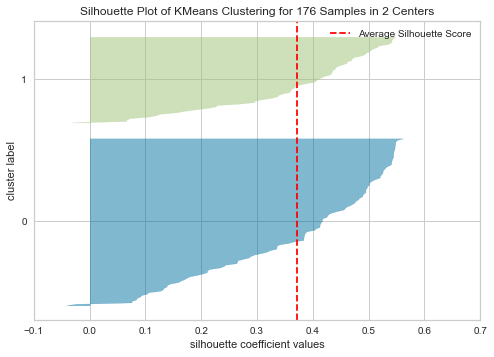

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 176 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [77]:
k_means2Vis = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
k_means2Vis.fit(X)
k_means2Vis.show()

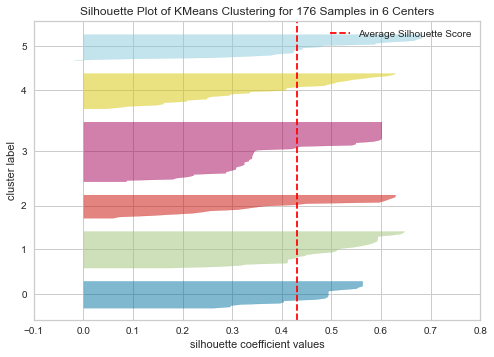

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 176 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
k_means6Vis = SilhouetteVisualizer(kmeans_6, colors='yellowbrick')
k_means6Vis.fit(X2)
k_means6Vis.show()

(array([116.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  60.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

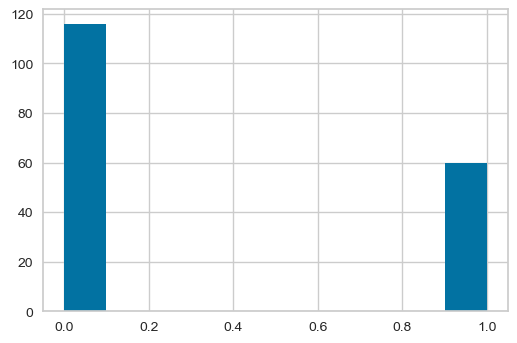

In [82]:
plt.figure(figsize=(6, 4), dpi=100)
plt.hist(kmeans_2_pred)

(array([ 17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 159.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 10 artists>)

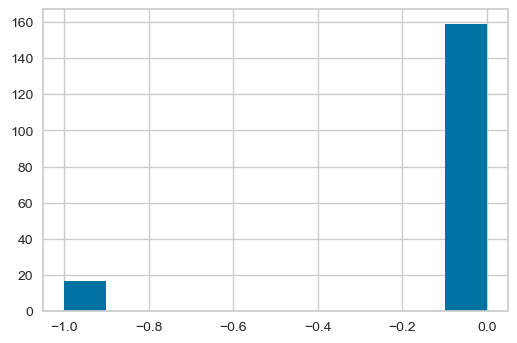

In [86]:
plt.figure(figsize=(6, 4), dpi=100)
plt.hist(dbs2_pred)

(array([50.,  0., 23.,  0., 32.,  0., 21.,  0., 20., 30.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

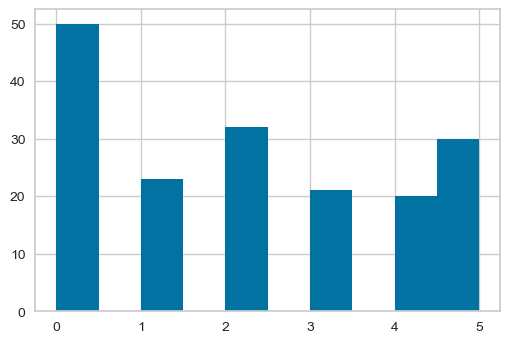

In [83]:
plt.figure(figsize=(6, 4), dpi=100)
plt.hist(kmeans_6_pred)

(array([ 5., 30., 28.,  0.,  7., 21.,  0., 30., 30., 25.]),
 array([-1. , -0.3,  0.4,  1.1,  1.8,  2.5,  3.2,  3.9,  4.6,  5.3,  6. ]),
 <BarContainer object of 10 artists>)

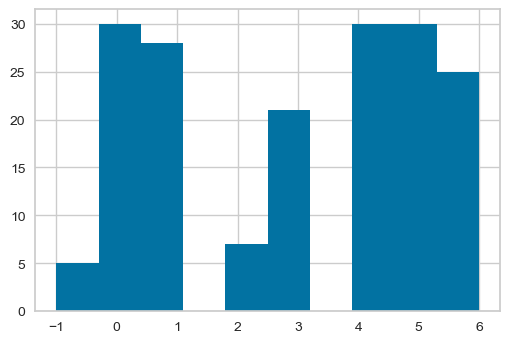

In [87]:
plt.figure(figsize=(6, 4), dpi=100)
plt.hist(dbs6_pred)

In [89]:
yeartemp.iloc[dbs6_pred== -1][['month', 'MinTemp']]

,month,MinTemp
111458,1,9.8
111496,3,21.2
111509,3,8.2
111523,3,8.9
111567,5,7.8


# Conclusions

- The implementation of  K-means algorithm was succesful. The same coordinates for centroids were obtained using both (DIY and scikit learn) methods  
- Two different data sets were clustered using K-means and DBSCAN methods. Using the first (X) data set, better results were obtained with K-mean, second (X2) dataset was clustered better with DBSCAN. 
- Hyperparameter k was adjusted using Elbow method. The parameter k was predicted incorrectly for the second dataset (X2). Visually, the best number of clusters is 6, but the number of clusters determined by the elbow method is two.
- Models were evaluated visually, using Shilouette plots and histograms. 
- The best results were obtained by clustering the temperature distribution according to different months (X2) using DBSCAN. This method clustered data into six clearly visible clusters.  